In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from scipy.spatial.distance import cdist
import pickle

def draw_bounds(ax, model):
    bounds = np.where(np.diff(np.argmax(model.segments_[0], axis=1)))[0]
    bounds_aug = np.concatenate(([0],bounds,[model.segments_[0].shape[0]]))
    for i in range(len(bounds_aug)-1):
        rect = patches.Rectangle((bounds_aug[i], bounds_aug[i]), bounds_aug[i+1]-bounds_aug[i], 
                                 bounds_aug[i+1]-bounds_aug[i], linewidth=1, edgecolor='#FFF9AE', 
                                 facecolor='none')
        ax.add_patch(rect)
    return ax


%matplotlib inline

## Set path

In [2]:
datadir = '../../../data/processed/'

## Load data

In [3]:
video_model, recall_models = np.load(datadir+'models_t100_v50_r10_resampled.npy', allow_pickle=True)
video_events = np.load(datadir+'video_events.npy')
with open(datadir+'video_eventseg_model', 'rb') as f:
    video_eventseg_model = pickle.load(f)
with open(datadir+'recall_eventseg_models', 'rb') as f:
    recall_event_models = pickle.load(f)
recall_events = np.load(datadir+'recall_events.npy', allow_pickle=True)
avg_recall_events = np.load(datadir+'avg_recall_events.npy')

## Plot figure

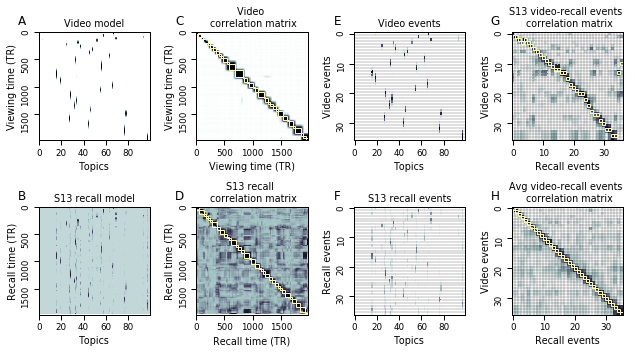

In [4]:
sns.set_context('paper')
fig,((a,c,e,g),(b,d,f,h)) = plt.subplots(2,4)
fig.set_size_inches(9, 5)
cmap = plt.cm.bone_r
mpl.rcParams['pdf.fonttype'] = 42

# video model
data = pd.DataFrame(video_model)
a = sns.heatmap(data, 
                 cmap=cmap, xticklabels=20, yticklabels=500, 
                 vmin=0, vmax=1, ax=a, cbar=False)
a.set_title('Video model')
a.set_ylabel('Viewing time (TR)')
a.set_xlabel('Topics')
for _, spine in a.spines.items():
    spine.set_visible(True)
a.collections[0].remove()
a.imshow(data, aspect='auto', cmap=cmap)

# s13 recall model
data = pd.DataFrame(recall_models[12])
b = sns.heatmap(data, 
                 cmap=cmap, xticklabels=20, yticklabels=500, 
                 vmin=0, vmax=1, ax=b, cbar=False)
b.set_title('S13 recall model')
b.set_ylabel('Recall time (TR)')
b.set_xlabel('Topics')
for _, spine in b.spines.items():
    spine.set_visible(True)
b.collections[0].remove()
b.imshow(data, aspect='auto', cmap=cmap)

# video correlation matrix
data = pd.DataFrame(video_model).T.corr()
c = sns.heatmap(data, 
                 cmap=cmap, xticklabels=500, yticklabels=500, 
                 vmin=0, vmax=1, ax=c, cbar=False)
c.set_title('Video \n correlation matrix')
c.set_ylabel('Viewing time (TR)')
c.set_xlabel('Viewing time (TR)')
for _, spine in c.spines.items():
    spine.set_visible(True)
c = draw_bounds(c, video_eventseg_model)
c.collections[0].remove()
c.imshow(data, aspect='auto', cmap=cmap)
    
# s13 recall correlation matrix
data = pd.DataFrame(recall_models[12]).T.corr()
d = sns.heatmap(data, 
                 cmap=cmap, xticklabels=500, yticklabels=500, 
                 vmin=0, vmax=1, ax=d, cbar=False)
d.set_title('S13 recall \n correlation matrix')
d.set_ylabel('Recall time (TR)')
d.set_xlabel('Recall time (TR)')
for _, spine in d.spines.items():
    spine.set_visible(True)
d.collections[0].remove()
d = draw_bounds(d, recall_event_models[12])
d.imshow(data, aspect='auto', cmap=cmap)

# video events
data = pd.DataFrame(video_events)
e = sns.heatmap(data, 
                 cmap=cmap, xticklabels=20, yticklabels=10, 
                 vmin=0, vmax=1, ax=e, cbar=False)
e.set_title('Video events')
e.set_ylabel('Video events')
e.set_xlabel('Topics')
for _, spine in e.spines.items():
    spine.set_visible(True)
e.hlines(list(range(video_events.shape[0])), *e.get_xlim(), linewidth=.25)

# recall events
data = pd.DataFrame(recall_events[12])
f = sns.heatmap(data, 
                 cmap=cmap, xticklabels=20, yticklabels=10, 
                 vmin=0, vmax=1, ax=f, cbar=False)
f.set_title('S13 recall events')
f.set_ylabel('Recall events')
f.set_xlabel('Topics')
for _, spine in f.spines.items():
    spine.set_visible(True)
f.hlines(list(range(recall_events[12].shape[0])), *f.get_xlim(), linewidth=.25)

# S13 video-recall correlation matrix
data = 1 - cdist(video_events, recall_events[12], 'correlation')
g = sns.heatmap(data, 
                 cmap=cmap, xticklabels=10, yticklabels=10, 
                 vmin=0, vmax=1, ax=g, cbar=False)
g.set_title('S13 video-recall events \n correlation matrix')
g.set_ylabel('Video events')
g.set_xlabel('Recall events')
for _, spine in g.spines.items():
    spine.set_visible(True)
g.hlines(list(range(recall_events[12].shape[1])), *g.get_xlim(), linewidth=.25)
g.vlines(list(range(recall_events[12].shape[0])), *g.get_ylim(), linewidth=.25)
bounds = np.argmax(data, axis=0)
for i in range(len(bounds)):
    rect = patches.Rectangle((i,bounds[i]), 1, 1, linewidth=1, edgecolor='#FFF9AE',facecolor='none', zorder=2)
    g.add_patch(rect)

# average video recall correlation matrix
data = 1 - cdist(video_events, avg_recall_events, 'correlation')
h = sns.heatmap(data, 
                 cmap=cmap, xticklabels=10, yticklabels=10, 
                 vmin=0, vmax=1, ax=h, cbar=False)
h.set_title('Avg video-recall events \n correlation matrix')
h.set_ylabel('Video events')
h.set_xlabel('Recall events')
for _, spine in h.spines.items():
    spine.set_visible(True)
h.hlines(list(range(video_events.shape[0])), *h.get_xlim(), linewidth=.25)
h.vlines(list(range(video_events.shape[0])), *h.get_ylim(), linewidth=.25)
bounds = np.argmax(data, axis=0)
for i in range(len(bounds)):
    rect = patches.Rectangle((i,bounds[i]), 1, 1, linewidth=1, edgecolor='#FFF9AE',facecolor='none', zorder=2)
    h.add_patch(rect)
    
# add labels
label=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for p, l in zip([a, b, c, d, e, f, g, h], label):
    p.text(-.15,1.07,l,
        horizontalalignment='center',
        transform=p.transAxes,
          fontsize=12)

# adjust spacing
plt.subplots_adjust(wspace=.45, hspace=.75)
plt.tight_layout()

# plt.savefig('../../../paper/figs/eventseg.pdf',  dpi = 1000)
plt.show()